In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
dataset['target'].shape # Y-axis

(150,)

In [4]:
dataset['data'].shape #X-Axis

(150, 4)

In [5]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

In [7]:
def distance(a,b):
    a = np.array(a)
    b = np.array(b)
    l2 = np.sum((b-a)**2)**0.5
    return l2

In [8]:
def knn(x_train,y_train,test_point,k):
    vals=[]
    for i in range(x_train.shape[0]): #Tuple has dimension 150,4 
        d=distance(x_train[i],test_point)
        vals.append([d, y_train[i]])
        
    sorted_labels=sorted(vals,key=lambda vals:vals[0])
    neighbors= np.asarray(sorted_labels)[:k,-1] # np.asarray saves memory by not duplicating
    freq = np.unique(neighbors, return_counts=True) #prints unique value but return_counts helps to count 
    index = freq[1].argmax()  #returns the index of where the most no. of times a nearby value occurs
    return freq[0][index] 

In [22]:
print("Available irises are: ", dataset.target_names)
index=np.zeros(4)
print("Enter Sepal Length, Sepal Width, Petal Length and Petal Width")
for i in range(4):
    index[i]=input()
print(index)
print("\nNow, let's move towards the testing: \n")
test_point=index

Available irises are:  ['setosa' 'versicolor' 'virginica']
Enter Sepal Length, Sepal Width, Petal Length and Petal Width
7
3.5
5
5
[7.  3.5 5.  5. ]

Now, let's move towards the testing: 



In [23]:
answer = knn(x_train,y_train,test_point,7)
print("I think this data belongs to the iris of type: ",dataset.target_names[int(answer)])

I think this data belongs to the iris of type:  virginica


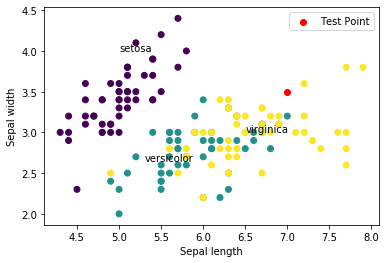

In [24]:
X=dataset.data[:,:2]
Y=dataset.target
plt.scatter( X[:, 0], X[:, 1],c=Y )
plt.scatter(test_point[0],test_point[1],c='r',label='Test Point')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.text(5,4,'setosa')
plt.text(5.3,2.65,'versicolor')
plt.text(6.5,3,'virginica')
plt.legend()
plt.show()